In [1]:
#In this micro Project we will work with Dataset contains daily records of air pollutant concentrations collected over time, including PM2.5, PM10, NO₂, SO₂, CO, and Ozone.
#It also logs the Air Quality Index (AQI), along with date (day, month, year) also includes number of holidays and weekday representation.
#We will try to create a model that will help predict AQI.



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
air = pd.read_csv("final_dataset.csv")
air.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [4]:
air.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [5]:
air.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

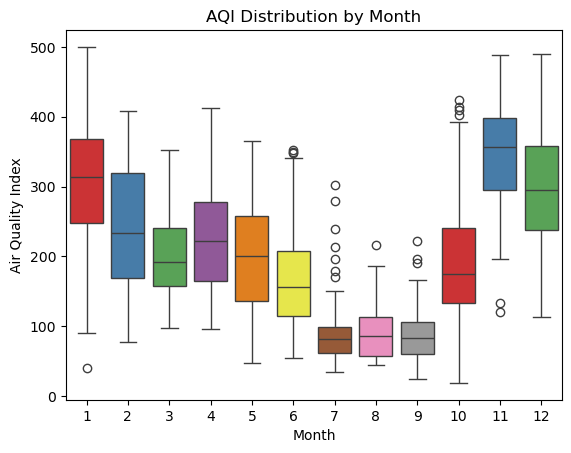

In [6]:
#Data Visualization
sns.boxplot(data=air, x='Month', y='AQI', palette='Set1')
plt.title('AQI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')
plt.show()

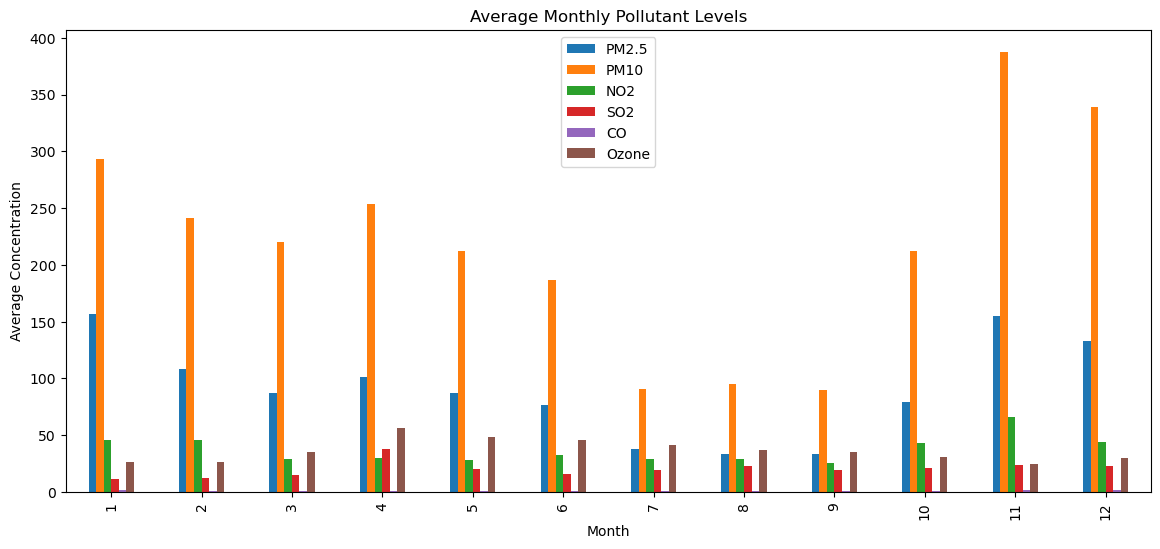

In [7]:
monthly_avg = air.groupby('Month')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']].mean()
monthly_avg.plot(kind='bar', figsize=(14, 6))
plt.title('Average Monthly Pollutant Levels')
plt.ylabel('Average Concentration')
plt.show()

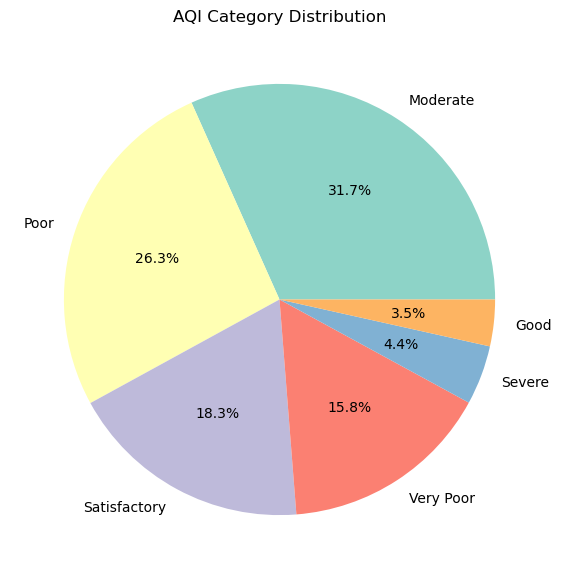

In [8]:
# Create AQI categories (you can adjust thresholds)
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

air['AQI_Category'] = air['AQI'].apply(categorize_aqi)
aqi_counts = air['AQI_Category'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('AQI Category Distribution')
plt.show()

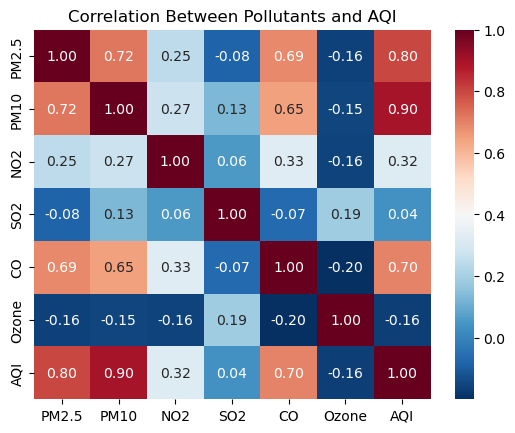

In [9]:
correlation = air[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='RdBu_r', fmt='.2f')
plt.title('Correlation Between Pollutants and AQI')
plt.show()

In [10]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,classification_report
from sklearn.ensemble import RandomForestRegressor

In [11]:
# Drop 'Date' column
air = air.drop(columns=['Date'])

# Drop missing values
air = air.dropna()

# Encode non-numeric columns (like 'Days')
for col in air.columns:
    if air[col].dtype == 'object':
        air[col] = LabelEncoder().fit_transform(air[col])

# Features and target
X = air.drop(columns=['AQI'])   # Input features
y = air['AQI']                  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ML models
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Model Accuracy
print('Accuracy of the model is =', 
       r2_score(y_test, y_pred))

Accuracy of the model is = 0.9693106797256328
